In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as hierarchy
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
class HierarchicalClustering:
    def __init__(self):
        # self.X = X
        pass
    
    def linkages(self, X, linkage_type='single'):
        Z = hierarchy.linkage(X, method = linkage_type)
        return Z

    def dendrogram(self, Z, title='Hierarchical Clustering Dendrogram'):
        # plt.figure(figsize=(10, 6))
        hierarchy.dendrogram(Z, truncate_mode='lastp', p=50, leaf_rotation=45, leaf_font_size=5, show_contracted=True)
        # hierarchy.dendrogram(Z, leaf_font_size=5)
        plt.title(title)
        plt.xlabel('data points')
        plt.ylabel('distance')


In [12]:
data = pd.read_csv('SMAI-Dataset-hc-dataset/new_customers.csv')
print(data)
data = data.drop('CustomerID', axis=1)
X = data

le = LabelEncoder()
X["Genre"] = le.fit_transform(X["Genre"])

X = X.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


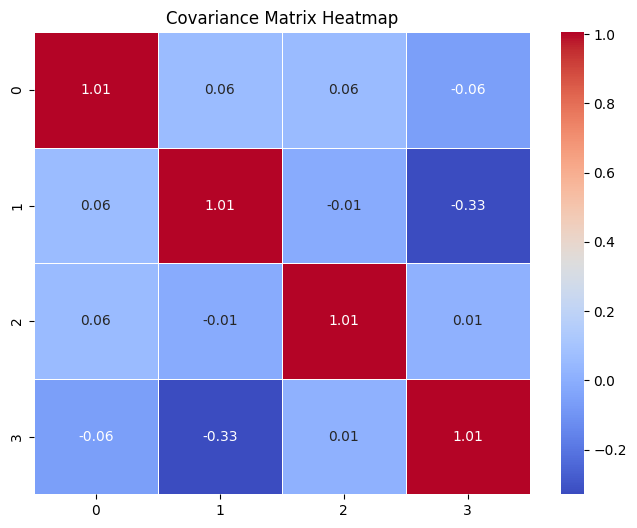

In [5]:
covariance_matrix = np.cov(X.T)
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

from the covariance matrix, we can see that the features of the dataset are pretty much independent of each other, so taking different combinations of features will give us different clustering. 

[[6.50000000e+01 6.80000000e+01 7.17666897e-02 2.00000000e+00]
 [1.29000000e+02 1.31000000e+02 7.17666897e-02 2.00000000e+00]
 [3.00000000e+00 5.00000000e+00 9.00803899e-02 2.00000000e+00]
 [1.14000000e+02 1.15000000e+02 1.05730374e-01 2.00000000e+00]
 [6.00000000e+01 7.00000000e+01 1.20910138e-01 2.00000000e+00]
 [1.17000000e+02 1.19000000e+02 1.30409100e-01 2.00000000e+00]
 [1.12000000e+02 1.21000000e+02 1.38349565e-01 2.00000000e+00]
 [4.80000000e+01 4.90000000e+01 1.43533379e-01 2.00000000e+00]
 [1.00000000e+02 1.05000000e+02 1.48690768e-01 2.00000000e+00]
 [1.47000000e+02 1.59000000e+02 1.53511726e-01 2.00000000e+00]
 [8.40000000e+01 8.70000000e+01 1.55855895e-01 2.00000000e+00]
 [4.60000000e+01 5.00000000e+01 1.56659188e-01 2.00000000e+00]
 [1.10000000e+01 1.90000000e+01 1.57536024e-01 2.00000000e+00]
 [9.60000000e+01 1.01000000e+02 1.67142352e-01 2.00000000e+00]
 [1.30000000e+01 2.02000000e+02 1.68703713e-01 3.00000000e+00]
 [1.09000000e+02 1.10000000e+02 1.71068042e-01 2.000000

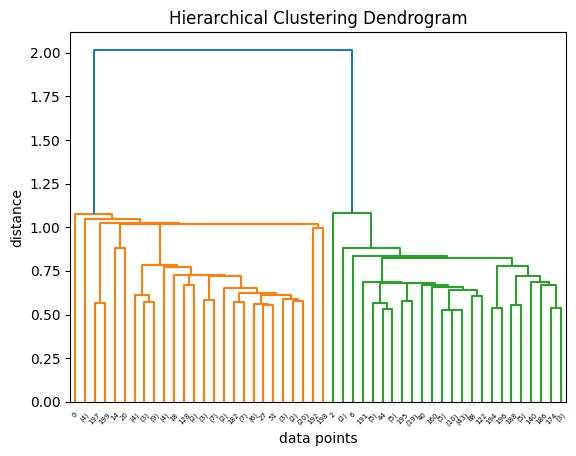

In [6]:
hc = HierarchicalClustering()
Z = hc.linkages(X, 'single')
print(Z)
hc.dendrogram(Z)

We can see that CustomerID plays no role in clustering the data. Therefore, we now cluster the data without that feature

### Linkage Method Observations

#### Single Linkage
- Emphasizes elongated or non-globular clusters.
- Is prone to chaining and sensitive to outliers.
- May yield incomplete or fragmented clusters.

#### Complete Linkage
- Forms compact, well-separated clusters.
- Tends to overlook smaller clusters.
- Sensitive to outliers but less so than single linkage.

#### Average Linkage
- Offers a balanced strategy for cluster formation.
- Adaptable to different cluster sizes and shapes.
- Robust against outliers, but sensitivity varies.

#### Median Linkage
- Suited for non-globular or elongated clusters.
- Less sensitive to outliers.
- Captures central tendencies within clusters.

#### Centroid Linkage
- Produces well-balanced, compact clusters.
- Effective for various cluster shapes and sizes.
- Sensitive to outliers affecting centroids.

#### Ward Linkage
- Creates compact, well-separated clusters.
- Less likely to miss small clusters than complete linkage.
- Sensitive to distances between cluster centroids.
- Minimizes variance increase within merged clusters.
- Versatile and adaptable to different data and objectives.

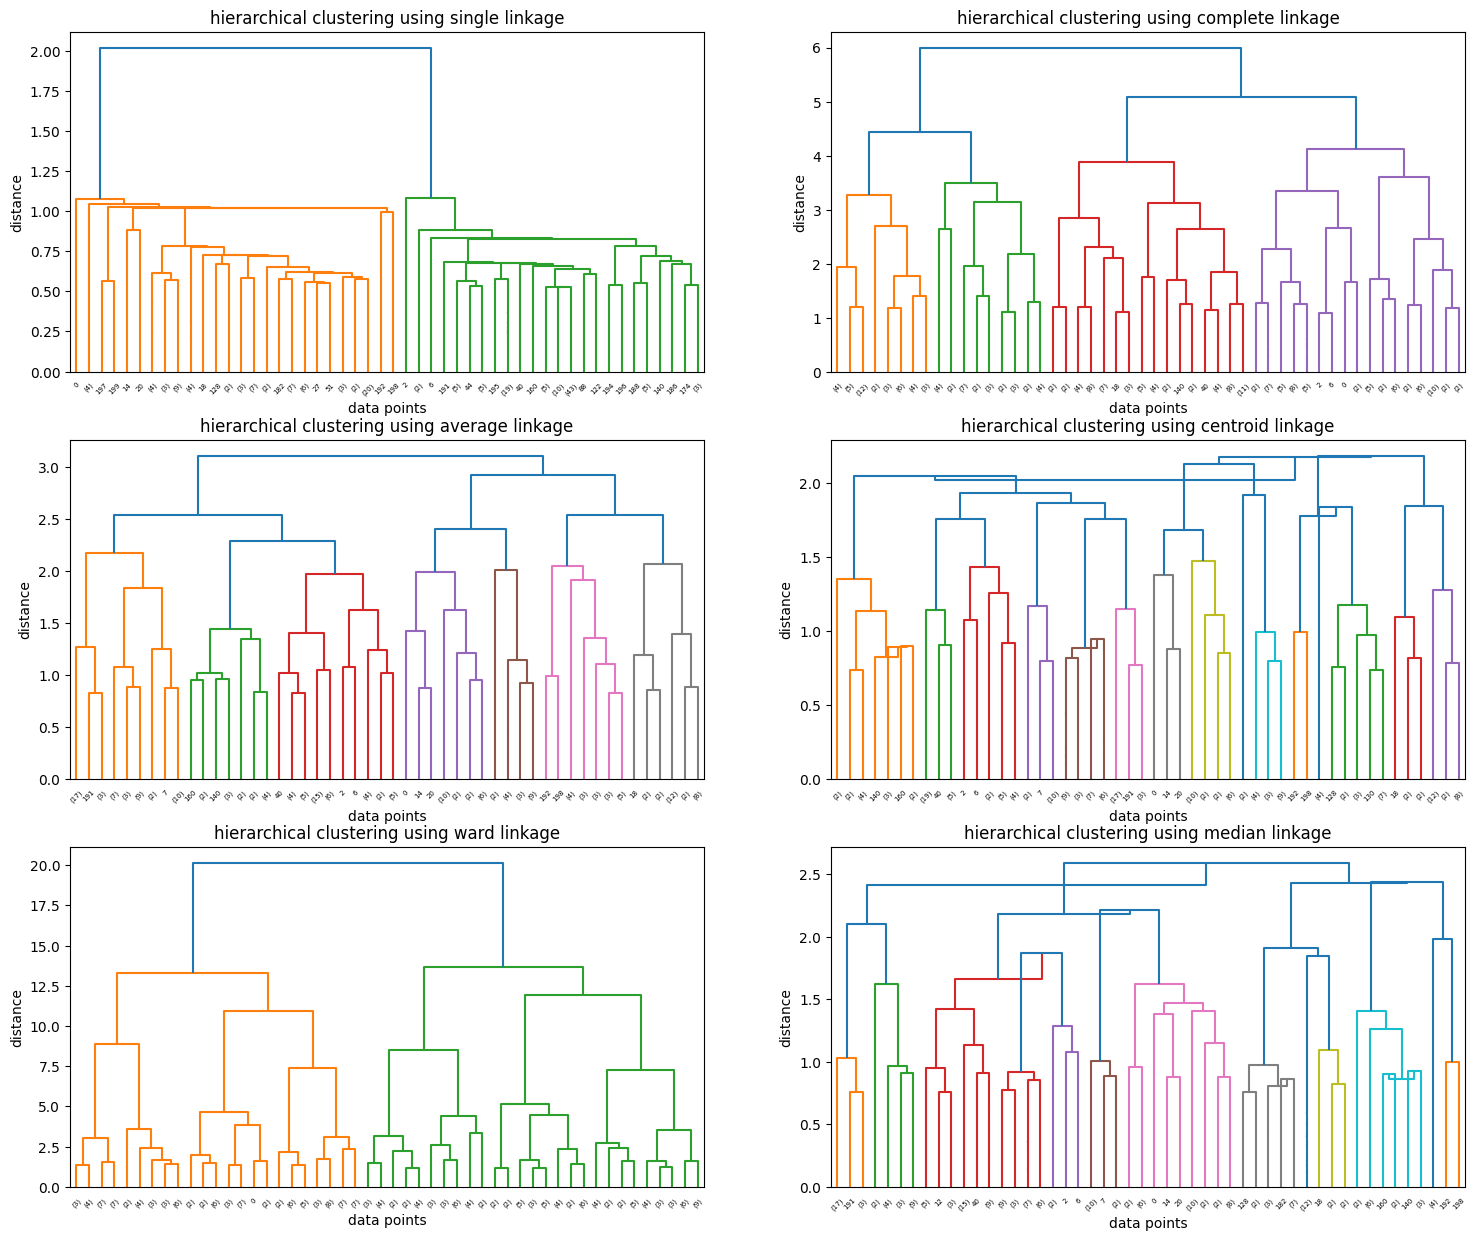

In [7]:
linkage_types = ['single', 'complete', 'average', 'centroid', 'ward', 'median']

# fig, ax = plt.subplots(9, figsize=(10, 54))
plt.figure(figsize=(18, 15))
hc = HierarchicalClustering()
for linkage_type in linkage_types:
    Z = hc.linkages(X, linkage_type)
    plt.subplot(3, 2, linkage_types.index(linkage_type) + 1)
    hc.dendrogram(Z, 'hierarchical clustering using ' + linkage_type + ' linkage')

from the above plot of dendogram for different linkage type, we can observe that ward linkage divides the data into clusters the best. This is because the difference in distance between consecutive division is maximum in case of ward. Also it divides the dataset into clusters of two. In this case median and centroid linkage gives the worst clustering

In [8]:
feature_names = list(data.columns)
print(feature_names)

k = 3

feature_combinations = list(combinations(feature_names, k))
# feature_combinations = feature_combinations.append(list(("Annual Income (k$)", "Spending Score (1-100)")))

['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


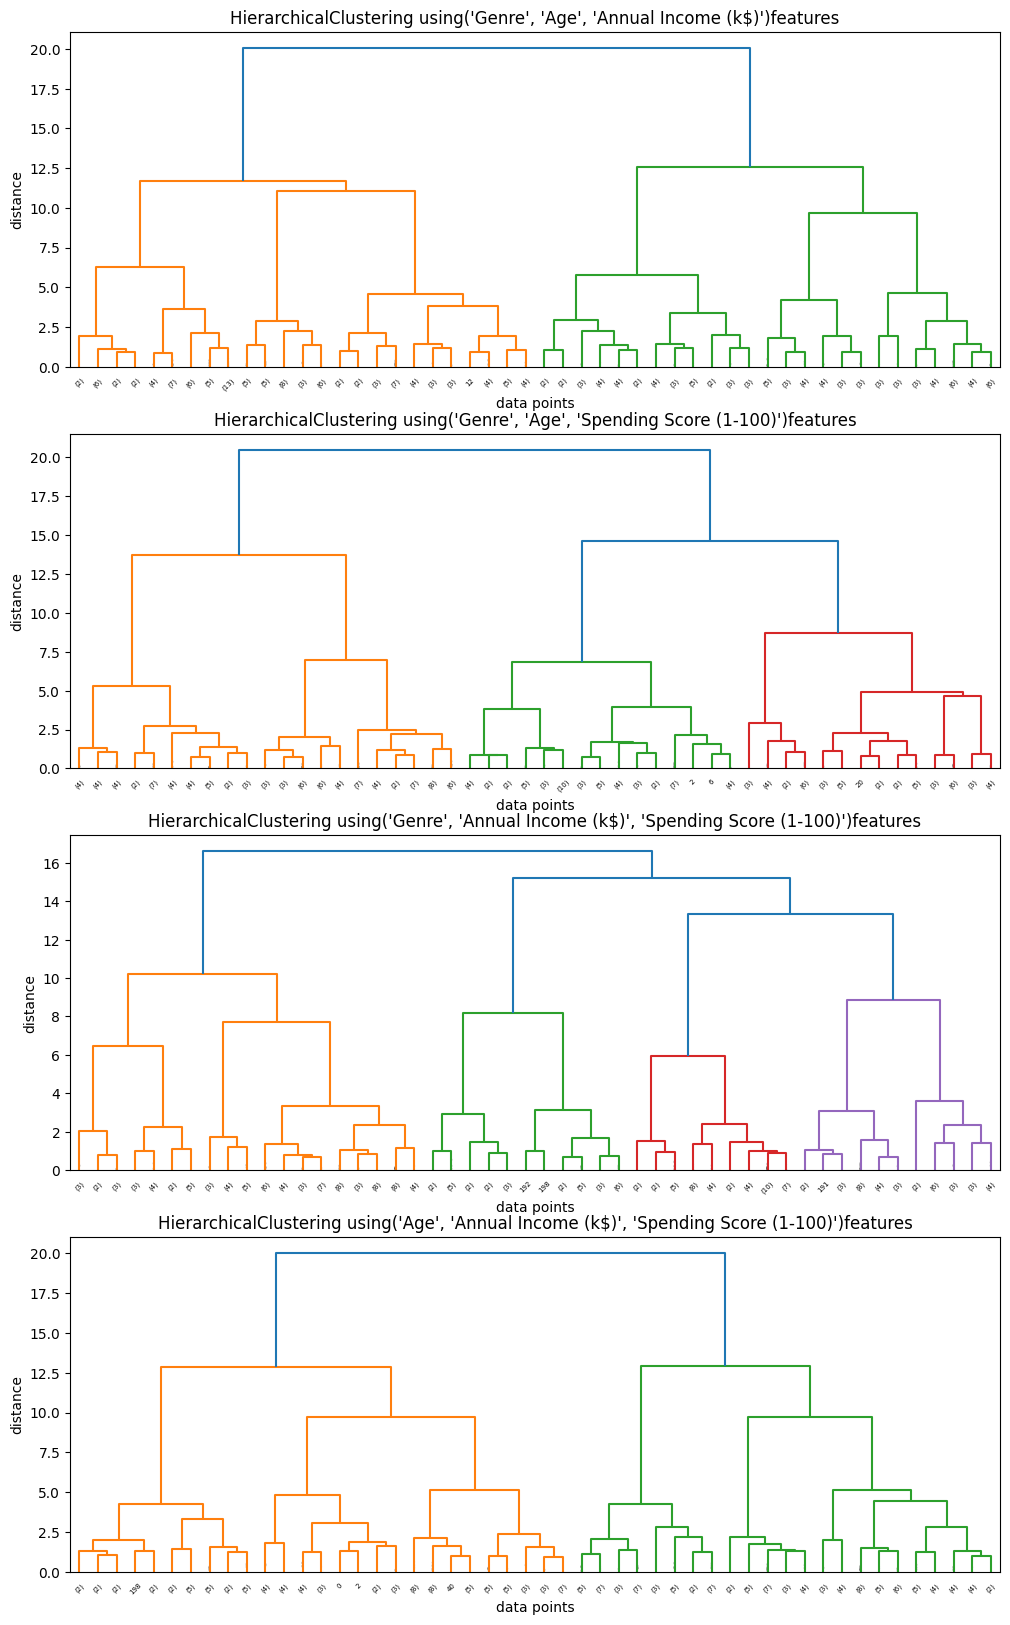

In [18]:
plt.figure(figsize=(12, 20))
for combo in feature_combinations:
    selected_features = data[list(combo)]
    X_selected = selected_features.values
    X_selected = scaler.fit_transform(X_selected)
    hc = HierarchicalClustering()
    Z = hc.linkages(X_selected, 'ward')
    plt.subplot(4, 1, feature_combinations.index(combo) + 1)
    hc.dendrogram(Z, 'HierarchicalClustering using' + str(combo) + 'features')

Taking different combinations of features of dataset gives us different dendogram. This means that the features of the dataset are independent and not much correlated. 

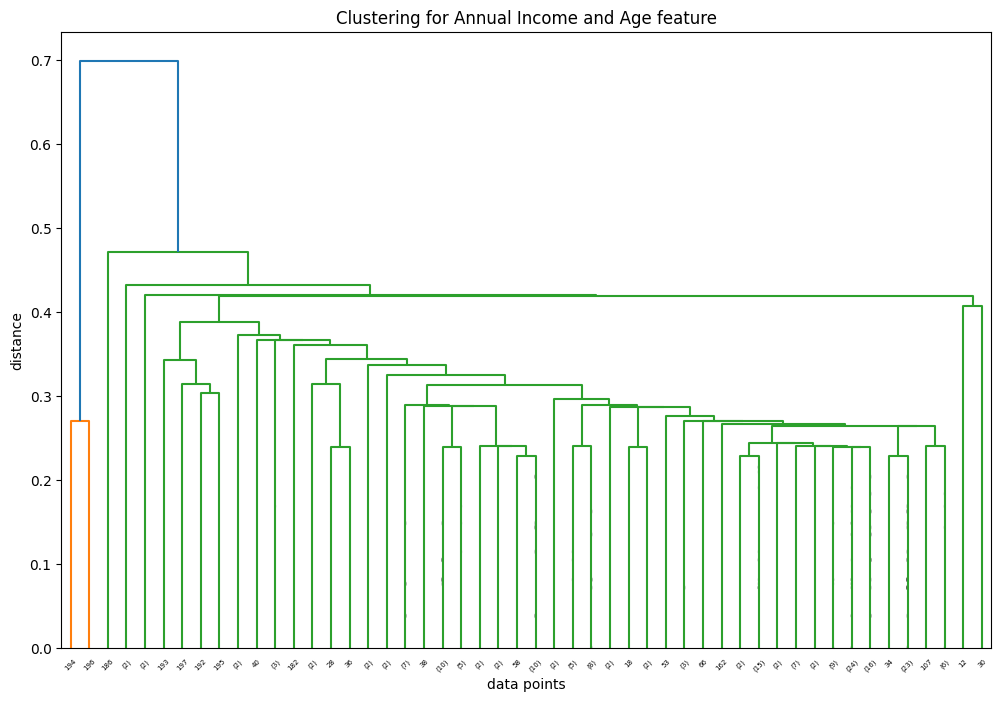

In [10]:
X_selected = data[['Annual Income (k$)', 'Age']].values
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'single')
plt.figure(figsize=(12, 8))
hc.dendrogram(Z, 'Clustering for Annual Income and Age feature')

Here we are just considering the age and annual income of the customer for clustering. The hierarchical clustering divides the dataset into two clusters. One of the clusters we get is very small and it combines with the whole dataset after a big distance gap. This can mean that this cluster mainly consist of outliers of the dataset maybe.

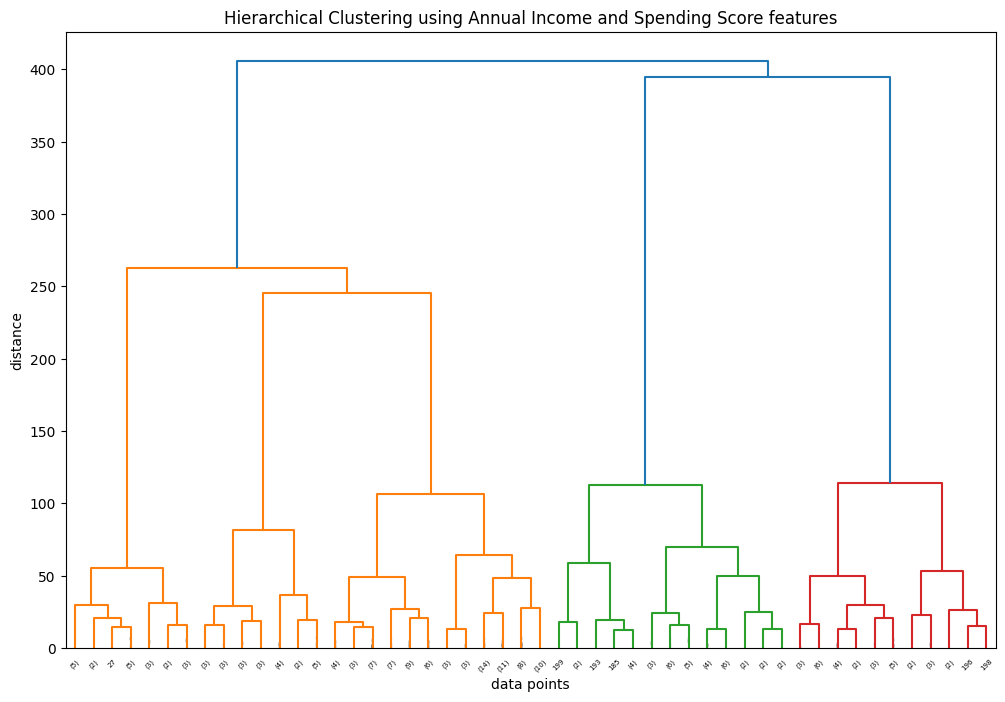

In [11]:
X_selected = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'ward')
plt.figure(figsize=(12, 8))
hc.dendrogram(Z, 'Hierarchical Clustering using Annual Income and Spending Score features')


Here, we divide the dataset into clusters based on spending and annual income features. we get a 3 as the optimal no of clusters. the length of the distance range for 3 clusters is approximately 130 units which is quite and indicates good clustering.

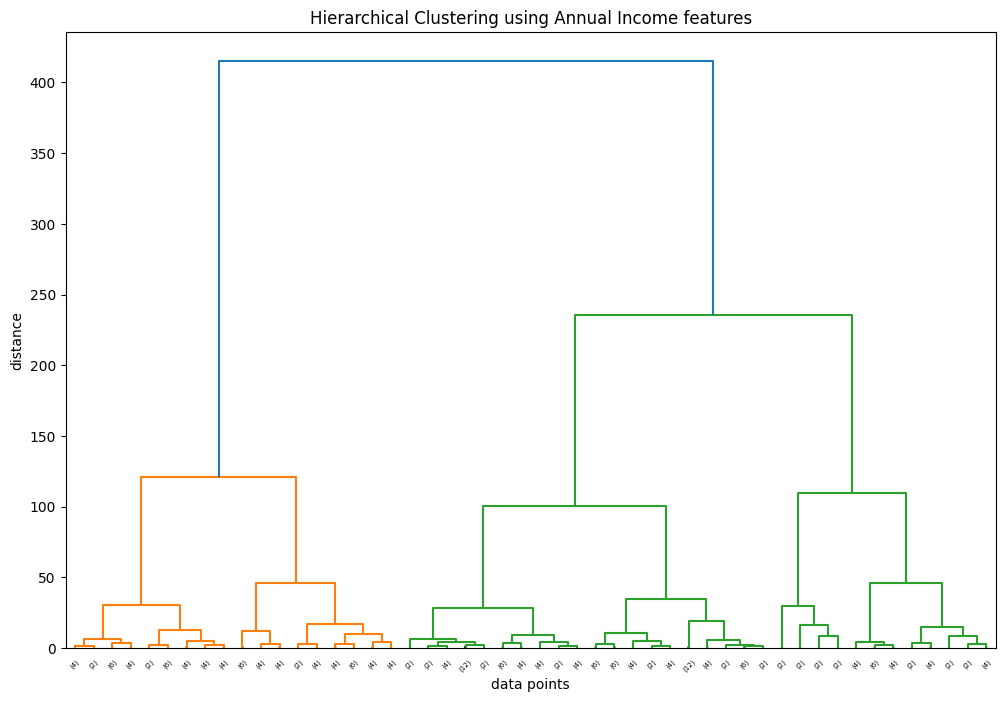

In [13]:
X_selected = data[['Annual Income (k$)']].values
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'ward')
plt.figure(figsize=(12, 8))
hc.dendrogram(Z, 'Hierarchical Clustering using Annual Income features')

Here we are dividing the dataset into clusters based on just annual income feature. The optimal no of clusters we get for this clustering is 2 and the length of the distance range for this clustering is approximately 160 which is highly so it gives good clustering. It divides the dataset into cluster of 2 with one having a high mean annual income and other having a low mean annual income.

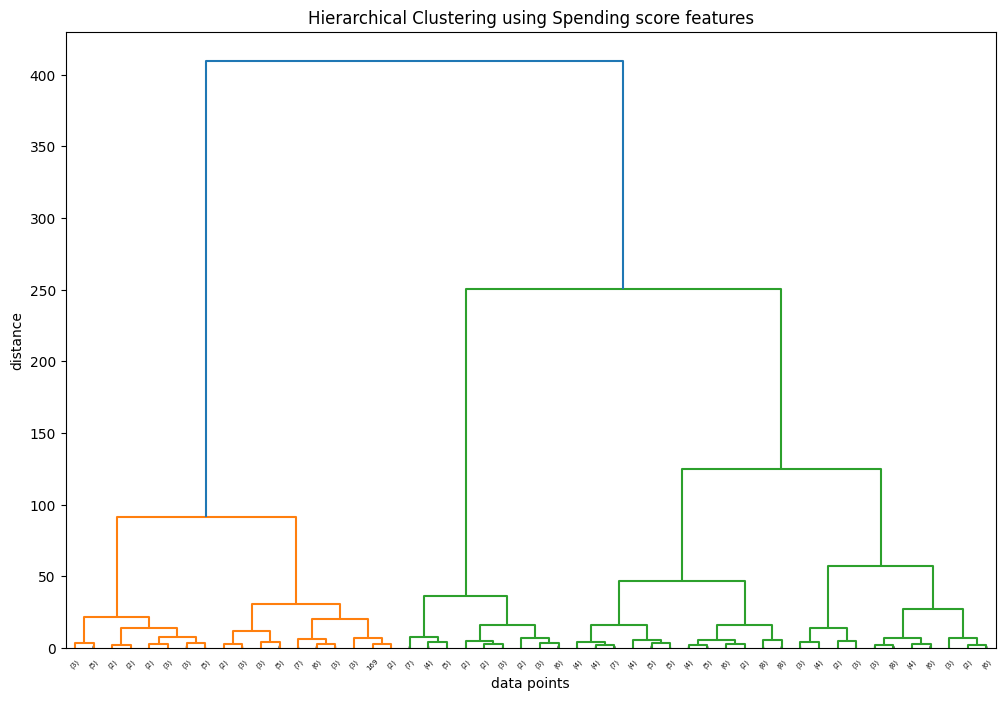

In [17]:
X_selected = data[['Spending Score (1-100)']].values
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'ward')
plt.figure(figsize=(12, 8))
hc.dendrogram(Z, 'Hierarchical Clustering using Spending score features')

Here we are considering only the spending score for clustering the dataset. Even for this the optimal no of clusters we get is 2. One cluster has a high mean spending score and the other clusters have a low mean spending score. 
Also we can see that when we consider one feature for clustering, the dendogram has a structure similar to binary tree. It first divides the clusters into two clusters and then further subdivides it into 2 more and so on.

In [14]:
# reading the data
data_gene = pd.read_csv('SMAI-Dataset-gene-expression/gene.csv')
data_gene.head()

,ID_REF,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,10338001,5192.23000,5974.6500,5393.02000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,10338002,301.50300,307.6770,362.59600,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,10338003,1850.11000,2037.5400,1891.18000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,10338004,927.98300,1140.8200,936.43300,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,10338005,5.24974,5.0173,5.09585,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062


In [15]:
X = data_gene.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

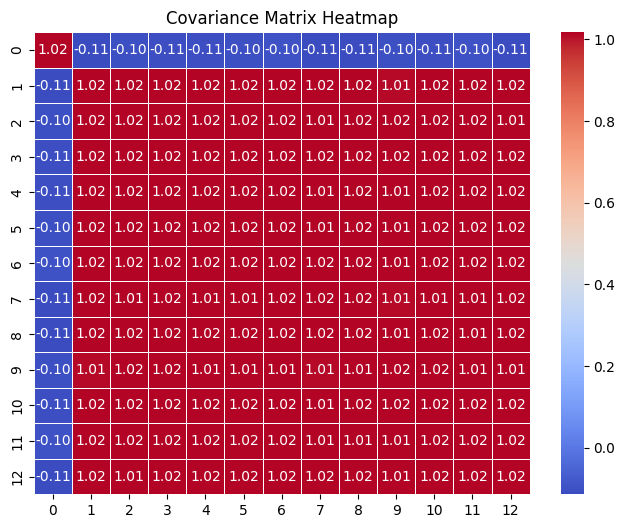

In [16]:
covariance_matrix = np.cov(X.T)
plt.figure(figsize=(8, 6)) 
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

from this covariance matrix heat map, we can observe that all the feature of the gene-dataset are highly correlated. So when we plot the dendogram for different subset of features, the dendogram should not vary much. Cause of the high interdependence of the features in the data-set, it will give similar clustering for any combination of the dataset.

[[1.20000000e+01 1.30000000e+01 5.97378768e-02 2.00000000e+00]
 [1.40000000e+01 5.80000000e+01 5.97411865e-02 3.00000000e+00]
 [3.00000000e+01 3.10000000e+01 5.97522325e-02 2.00000000e+00]
 [5.60000000e+01 5.70000000e+01 5.97638181e-02 2.00000000e+00]
 [2.90000000e+01 6.00000000e+01 5.97695860e-02 3.00000000e+00]
 [2.00000000e+01 2.10000000e+01 5.98061019e-02 2.00000000e+00]
 [1.10000000e+01 5.90000000e+01 5.98324148e-02 4.00000000e+00]
 [4.00000000e+00 5.00000000e+00 5.99964180e-02 2.00000000e+00]
 [6.00000000e+00 6.50000000e+01 6.19279062e-02 3.00000000e+00]
 [2.20000000e+01 6.30000000e+01 6.47172019e-02 3.00000000e+00]
 [7.00000000e+00 6.60000000e+01 7.39830419e-02 4.00000000e+00]
 [9.00000000e+00 6.40000000e+01 1.19474137e-01 5.00000000e+00]
 [5.30000000e+01 5.50000000e+01 1.19995152e-01 2.00000000e+00]
 [4.90000000e+01 5.10000000e+01 1.20253020e-01 2.00000000e+00]
 [4.50000000e+01 4.70000000e+01 1.23232781e-01 2.00000000e+00]
 [7.10000000e+01 7.20000000e+01 1.27801791e-01 4.000000

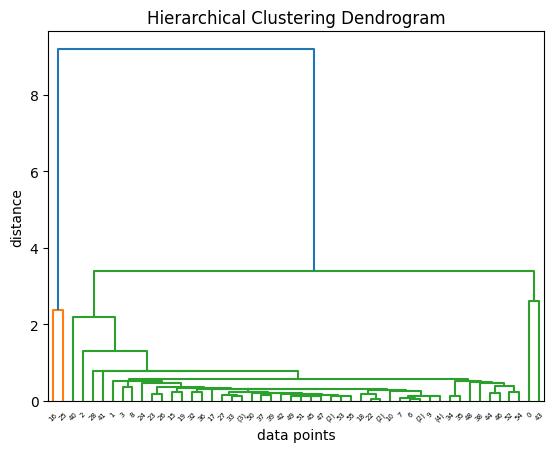

In [13]:
hc = HierarchicalClustering()
Z = hc.linkages(X, 'single')
print(Z)
hc.dendrogram(Z)

In [14]:
data_gene_new = data_gene.drop("ID_REF", axis=1)
X = data_gene_new.values

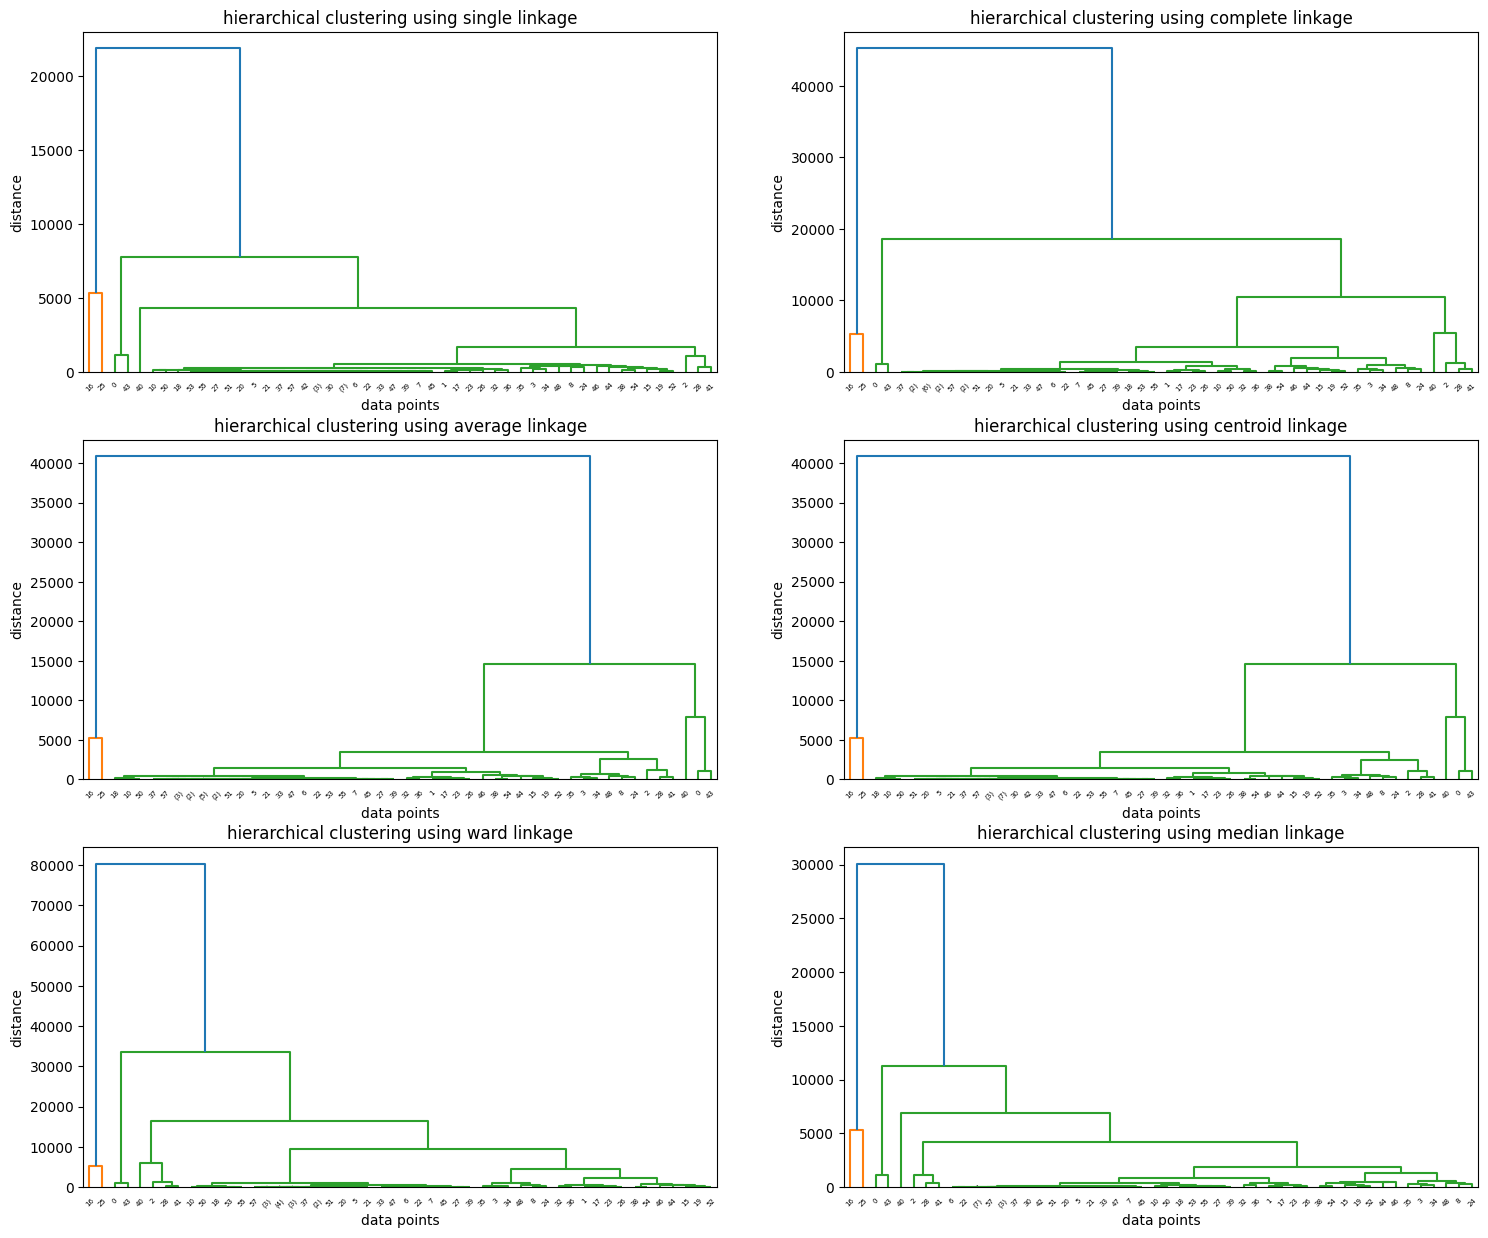

In [67]:
linkage_types = ['single', 'complete', 'average', 'centroid', 'ward', 'median']

# fig, ax = plt.subplots(9, figsize=(10, 54))
plt.figure(figsize=(18, 15))
hc = HierarchicalClustering()
for linkage_type in linkage_types:
    Z = hc.linkages(X, linkage_type)
    plt.subplot(3, 2, linkage_types.index(linkage_type) + 1)
    hc.dendrogram(Z, 'hierarchical clustering using ' + linkage_type + ' linkage')

Here in the above plots, we are varying the linkages type for hierarchical clustering. We observe that ward linkage gives the best clustering (distance difference between consecutive division is maximum). Also any linkage type divides the dataset into 2 cluster. But one of the clusters of the dataset is small and joins with the whole dataset after a long distance gap. So we can say that this cluster mainly consist of outliers maybe.

In [15]:
feature_names = list(data_gene_new.columns)
print(feature_names)

# taking different combination of features and plotting dendrogram
k = 5
feature_combinations = list(combinations(feature_names, k))
n = len(feature_combinations)
feature_combinations = feature_combinations[: 5]

['GSM613412', 'GSM613413', 'GSM613414', 'GSM613415', 'GSM613416', 'GSM613417', 'GSM613418', 'GSM613419', 'GSM613420', 'GSM613421', 'GSM613422', 'GSM613423']


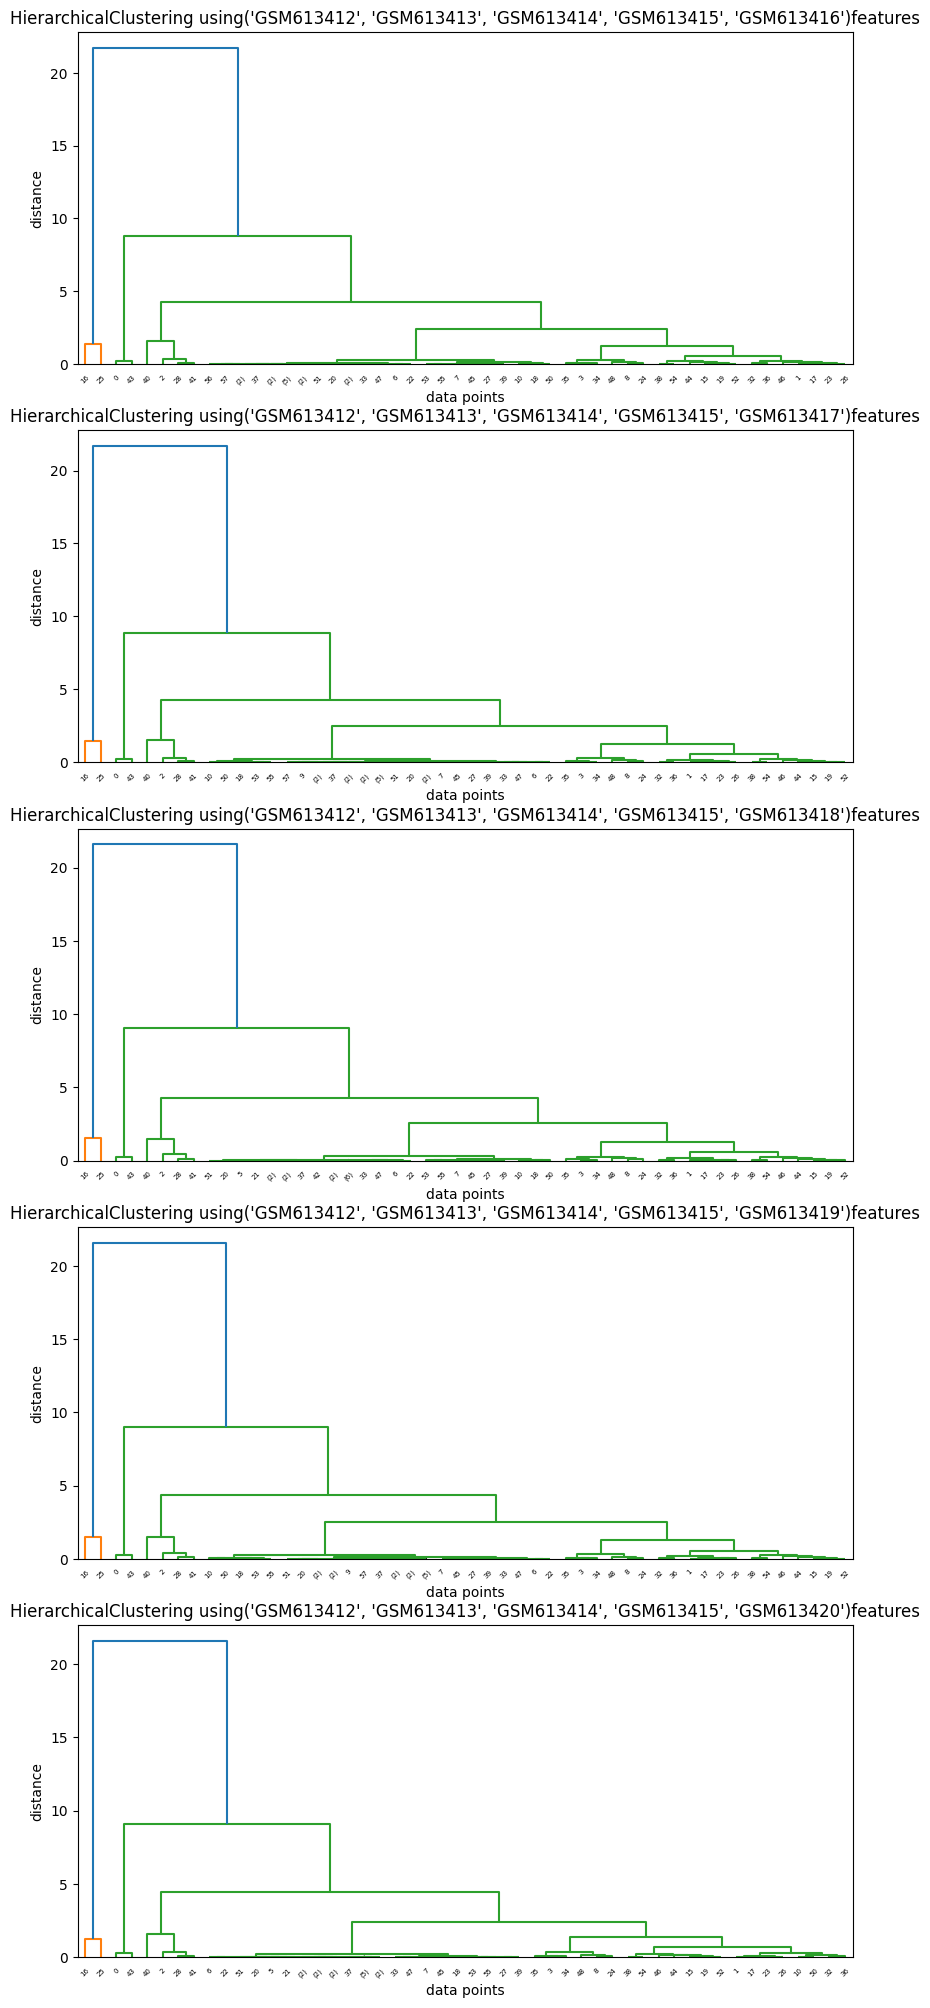

In [16]:
plt.figure(figsize=(10, 25))
for combo in feature_combinations:
    selected_features = data_gene[list(combo)]
    X_selected = selected_features.values
    X_selected = scaler.fit_transform(X_selected)
    hc = HierarchicalClustering()
    Z = hc.linkages(X_selected, 'ward')
    plt.subplot(5, 1, feature_combinations.index(combo) + 1)
    hc.dendrogram(Z, 'HierarchicalClustering using' + str(combo) + 'features')

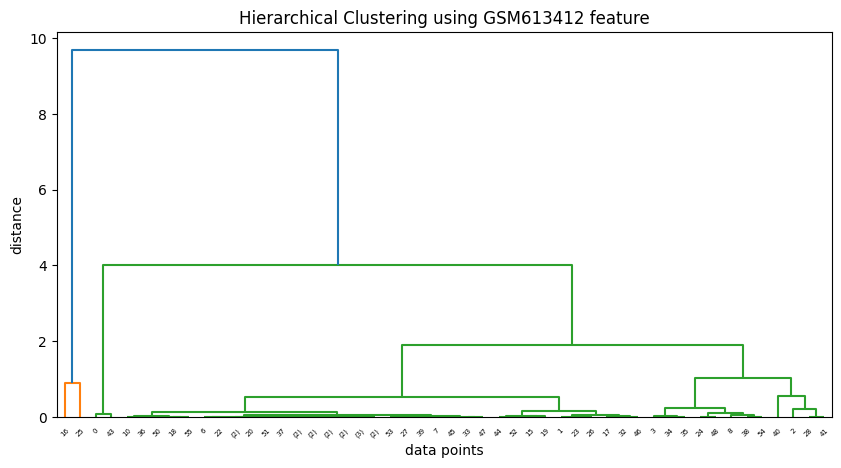

In [75]:
# taking few feature one by one and plotting dendrogram
X_selected = data_gene[['GSM613412']].values
X_selected = scaler.fit_transform(X_selected)
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'ward')
plt.figure(figsize=(10, 5))
hc.dendrogram(Z, 'Hierarchical Clustering using GSM613412 feature')

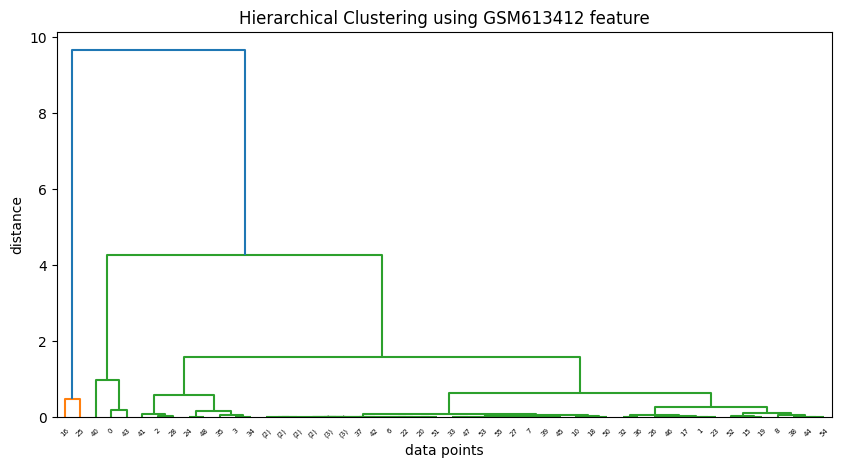

In [76]:
X_selected = data_gene[['GSM613413']].values
X_selected = scaler.fit_transform(X_selected)
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'ward')
plt.figure(figsize=(10, 5))
hc.dendrogram(Z, 'Hierarchical Clustering using GSM613413 feature')

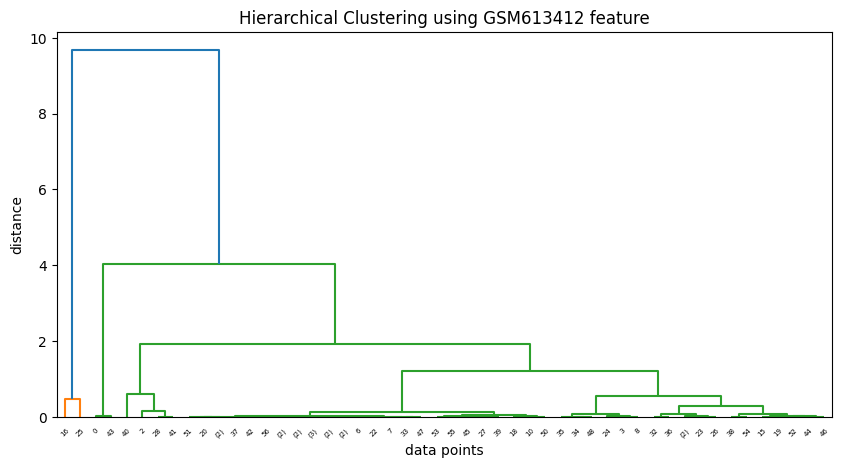

In [77]:
X_selected = data_gene[['GSM613414']].values
X_selected = scaler.fit_transform(X_selected)
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'ward')
plt.figure(figsize=(10, 5))
hc.dendrogram(Z, 'Hierarchical Clustering using GSM613414 feature')

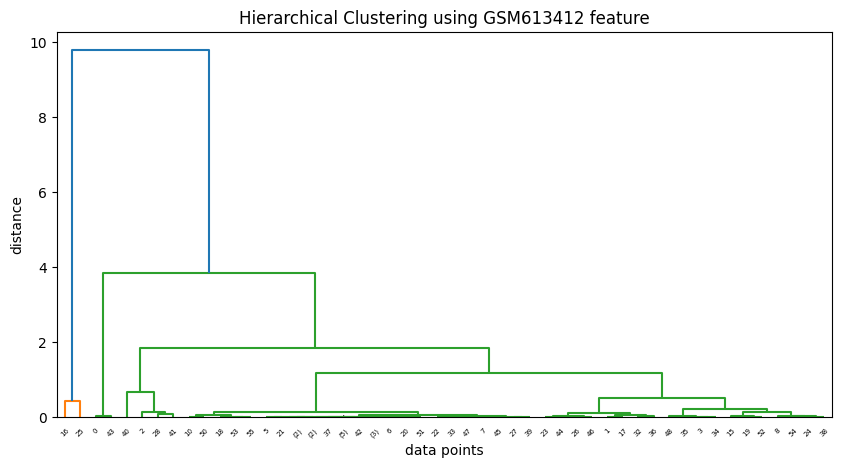

In [78]:
X_selected = data_gene[['GSM613415']].values
X_selected = scaler.fit_transform(X_selected)
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'ward')
plt.figure(figsize=(10, 5))
hc.dendrogram(Z, 'Hierarchical Clustering using GSM613415 feature')

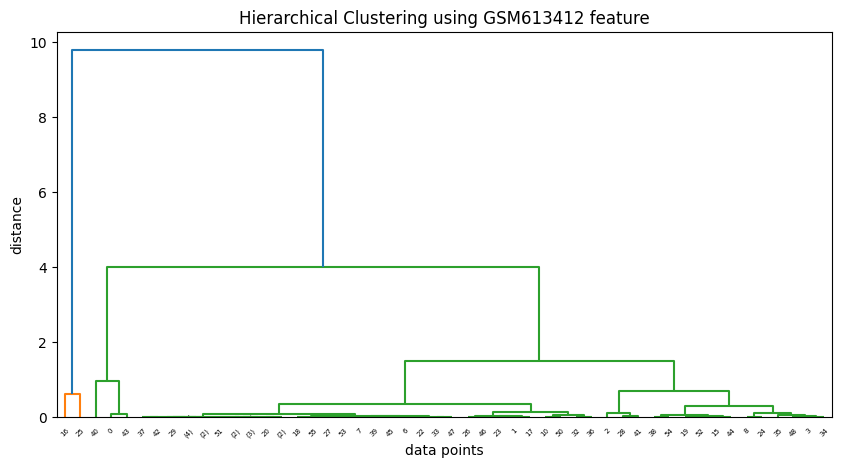

In [79]:
X_selected = data_gene[['GSM613416']].values
X_selected = scaler.fit_transform(X_selected)
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'ward')
plt.figure(figsize=(10, 5))
hc.dendrogram(Z, 'Hierarchical Clustering using GSM613416 feature')

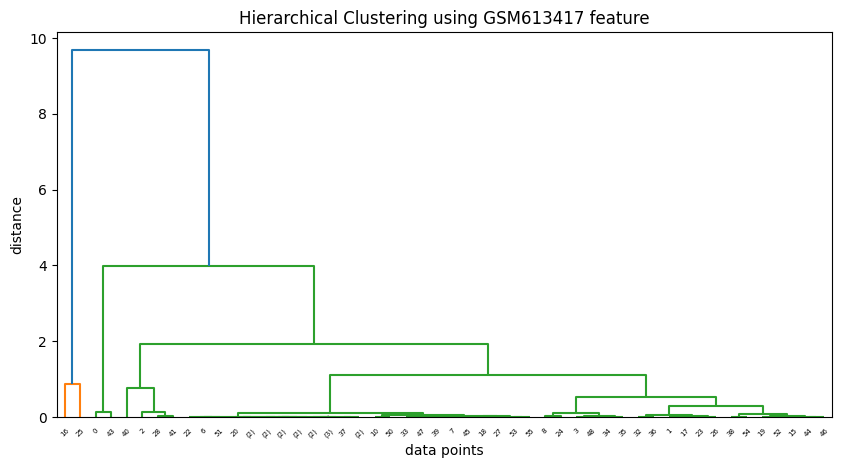

In [80]:
X_selected = data_gene[['GSM613417']].values
X_selected = scaler.fit_transform(X_selected)
hc = HierarchicalClustering()
Z = hc.linkages(X_selected, 'ward')
plt.figure(figsize=(10, 5))
hc.dendrogram(Z, 'Hierarchical Clustering using GSM613417 feature')

from the above plot, we can observe that changing the combination of features doesn't change the dendogram/ clustering much. This is happening because the feature are highly correlated. And also the optimal clustering we get in all case is 2. But one the clusters combines with the whole dataset after a log distance gap which can indicate that this cluster mainly consist of outliners maybe.